# 모듈 및 데이터 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('Superstore.xls')

# 데이터 확인

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

# Data Cleaning

In [6]:
# Furniture 데이터만 필터링
data = data[data['Category'] == 'Furniture']

In [7]:
# 필요한 컬럼만 필터링
data = data[['Order Date','Sales']]

In [8]:
# 날짜별로 Groupby 하여, Sales 총합 계산
data = data.groupby('Order Date').sum()

In [9]:
# 월별 평균 Sales 계산
data = data.resample('MS').mean()

<Axes: xlabel='Order Date'>

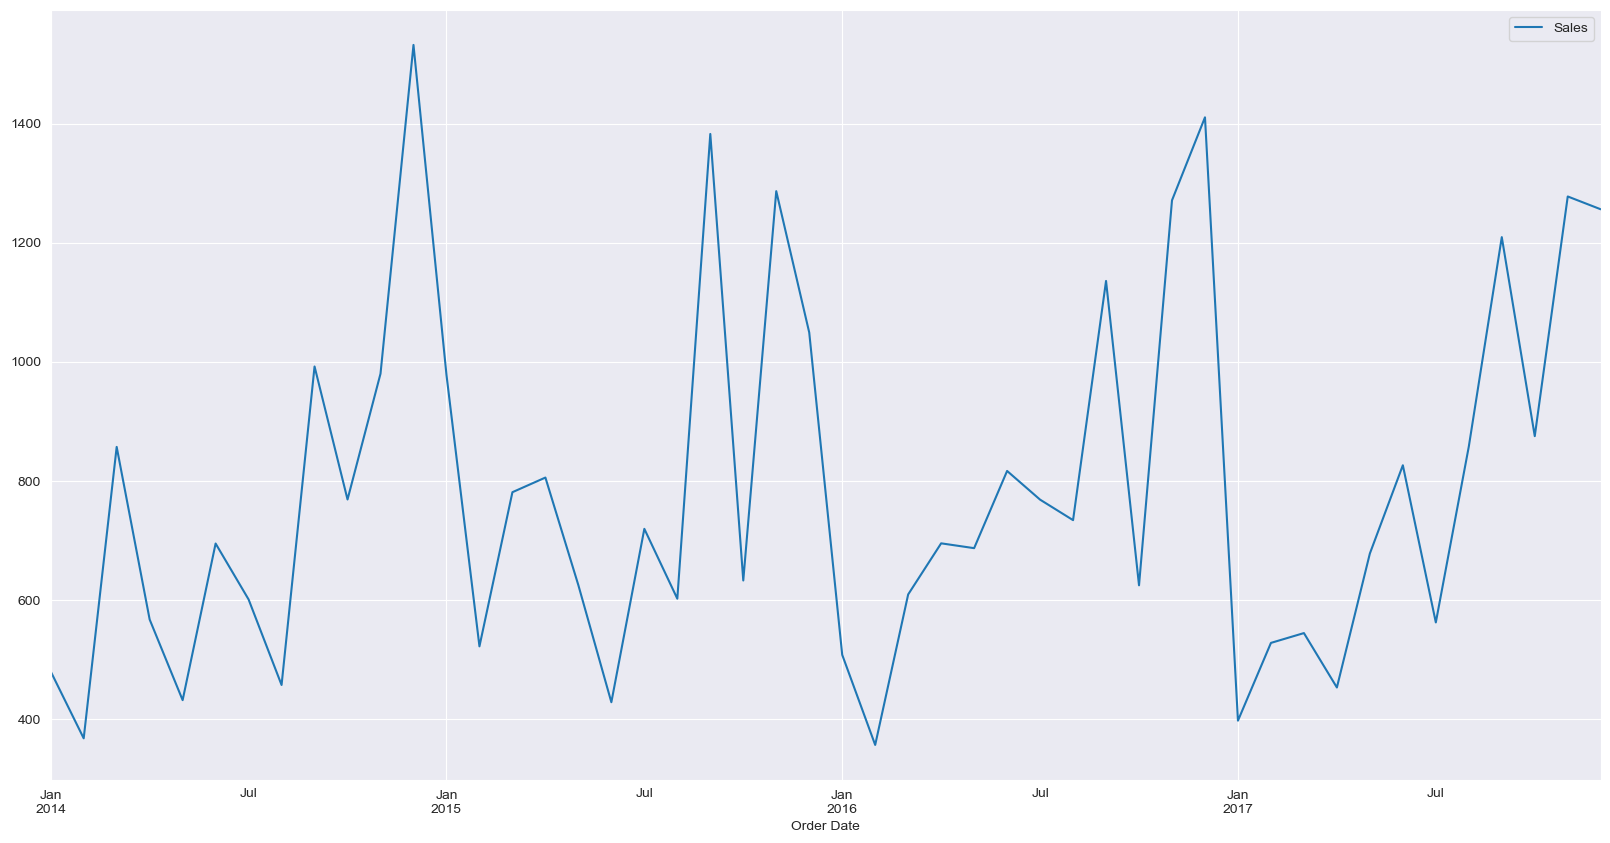

In [10]:
# Line plot으로 그려보기
data.plot(figsize=(20,10))

# Prophet 알고리즘으로 모델링

In [11]:
!pip install fbprophet

     ---------------------------------------- 64.0/64.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Cython-0.29.34-py2.py3-none-any.whl (988 kB)
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
     ---------------------------------------- 47.9/47.9 kB ? eta 0:00:00
     ------------------------------------- 499.9/499.9 kB 15.8 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 155.4/155.4 kB 9.1 MB/s eta 0:00:00
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
     ------------------------------------- 319.8/319.8 kB 10.0 MB/s eta 0:00:00
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\User\AppData\Local\Temp\pip-install-4xgbecmg\pystan_8ba21b9e361e49a2b2d8667d8f02a8bc\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [13]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [14]:
# 인덱스에 들어있는 날짜부분을 꺼내기위해 reset_index
df = data.reset_index()

In [15]:
# Prophet 알고리즘은 ds와 y로 컬럼이름을 변경해주어야함
df.columns = ['ds','y']

In [16]:
# Prophet 모델 트레이닝
model = Prophet()
model.fit(df)

NameError: name 'Prophet' is not defined

In [28]:
#  기간을 30달로 설정하여 예측 구간 설정
future = model.make_future_dataframe(periods=30, freq='M')
future.tail()

,ds
73,2020-01-31
74,2020-02-29
75,2020-03-31
76,2020-04-30
77,2020-05-31


In [17]:
# 예측 데이터 생성
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


NameError: name 'model' is not defined

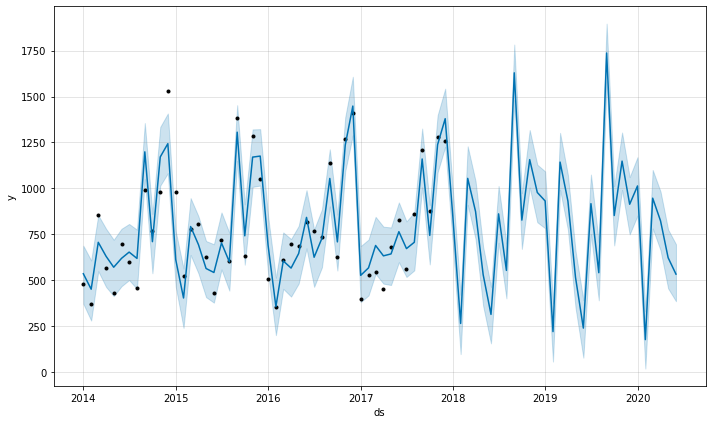

In [30]:
# Line Plot으로 예측된 데이터 그려보기
fig1 = model.plot(forecast)

# 2017년 데이터 예측하여 비교해보기

In [31]:
# 트레이닝 데이터는 2016년까지 데이터로 필터링
new_df = data[:'2016']

In [32]:
# 인덱스 리셋하고 컬럼명 변경
new_df.reset_index(inplace=True)
new_df.columns = ['ds','y']

In [33]:
# 트레이닝 및 예측 데이터 생성 (2017년 데이터 예측이므로 기간은 12개월)
model = Prophet()
model.fit(new_df)

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
43,2017-07-31,592.725467,435.638851,729.824814
44,2017-08-31,1552.598605,1401.119550,1706.057174
45,2017-09-30,885.375984,740.089703,1037.814698
46,2017-10-31,1288.856499,1134.539028,1433.525194
47,2017-11-30,1189.171106,1041.584896,1348.149990


In [34]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,681.588221,491.565711,771.032000,681.588221,681.588221,-47.448839,-47.448839,-47.448839,-47.448839,-47.448839,-47.448839,0.0,0.0,0.0,634.139383
1,2014-02-01,685.636336,252.495895,555.165953,685.636336,685.636336,-274.076247,-274.076247,-274.076247,-274.076247,-274.076247,-274.076247,0.0,0.0,0.0,411.560089
2,2014-03-01,689.292699,588.194292,882.234241,689.292699,689.292699,42.432008,42.432008,42.432008,42.432008,42.432008,42.432008,0.0,0.0,0.0,731.724707
3,2014-04-01,693.340814,510.855682,812.184602,693.340814,693.340814,-34.565068,-34.565068,-34.565068,-34.565068,-34.565068,-34.565068,0.0,0.0,0.0,658.775746
4,2014-05-01,697.258345,381.906358,688.749769,697.258345,697.258345,-165.311506,-165.311506,-165.311506,-165.311506,-165.311506,-165.311506,0.0,0.0,0.0,531.946838
5,2014-06-01,701.306460,422.322009,712.230801,701.306460,701.306460,-133.386474,-133.386474,-133.386474,-133.386474,-133.386474,-133.386474,0.0,0.0,0.0,567.919985
6,2014-07-01,705.223991,500.229394,796.481336,705.223991,705.223991,-58.042923,-58.042923,-58.042923,-58.042923,-58.042923,-58.042923,0.0,0.0,0.0,647.181068
7,2014-08-01,709.272106,388.505014,675.468331,709.272106,709.272106,-171.626465,-171.626465,-171.626465,-171.626465,-171.626465,-171.626465,0.0,0.0,0.0,537.645640
8,2014-09-01,713.320221,1007.366562,1308.664514,713.320221,713.320221,436.759245,436.759245,436.759245,436.759245,436.759245,436.759245,0.0,0.0,0.0,1150.079466
9,2014-10-01,717.237752,502.057000,780.552363,717.237752,717.237752,-76.340818,-76.340818,-76.340818,-76.340818,-76.340818,-76.340818,0.0,0.0,0.0,640.896934


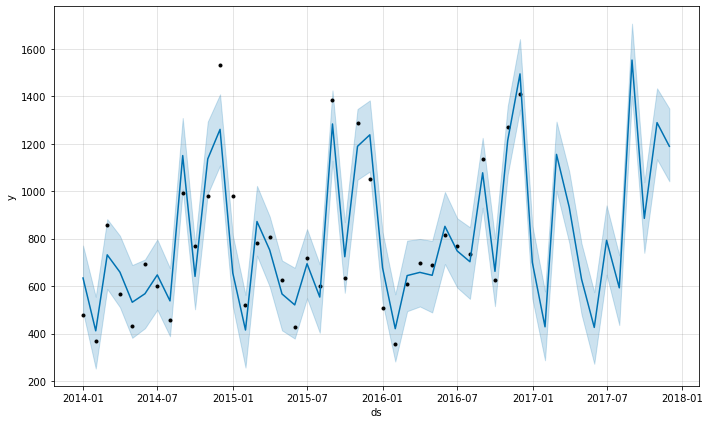

In [35]:
# 예측 데이터로 Line plot 그려보기
fig1 = model.plot(forecast)

In [36]:
# 비교 plot을 그리기위해 예측 데이터의 날짜부분을 인덱스로 설정
forc = forecast[['ds','yhat']].set_index('ds')

<AxesSubplot:xlabel='ds'>

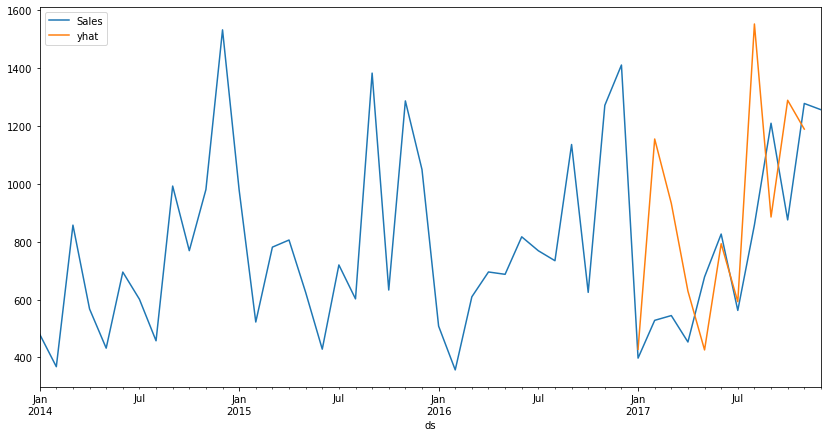

In [37]:
# 원본 데이터와 예측데이터를 하나의 plot으로 그려서 비교하기
ax = data.plot()
forc.loc['2017-01-01':].plot(ax=ax, figsize=(14, 7))

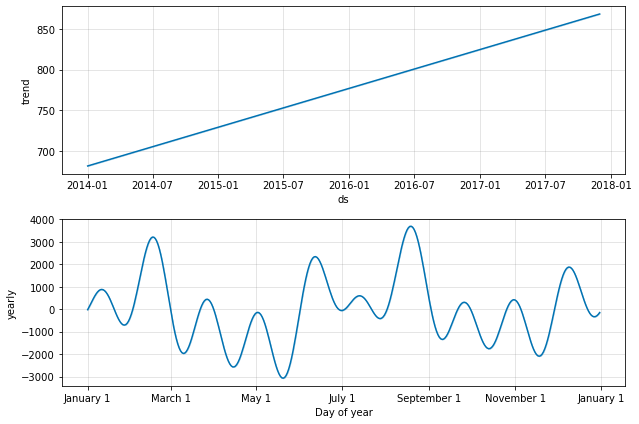

In [38]:
# 예측 모델의 구성요소 plot 확인하기
model.plot_components(forecast)
plt.show()

# Auto Regression 모델로 2017년 데이터 예측하기

In [39]:
# 트레이닝 데이터는 2016년까지 데이터로 필터링 
new_df = data[:'2016']

In [41]:
from statsmodels.tsa.ar_model import AutoReg

In [42]:
# 지난 12개월의 데이터를 학습하도록 모델링
model = AutoReg(new_df, lags=12)
model_fit = model.fit()

C:\Users\Sean\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [43]:
# 예측 데이터 생성
predictions = model_fit.predict(start=len(new_df), end=len(new_df)+11)

In [44]:
predictions

2017-01-01     660.758250
2017-02-01     310.973369
2017-03-01     433.467903
2017-04-01     589.733771
2017-05-01     634.609408
2017-06-01     932.697417
2017-07-01     959.741129
2017-08-01     983.674137
2017-09-01     989.383080
2017-10-01     554.888314
2017-11-01    1030.961310
2017-12-01    1194.389892
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Order Date'>

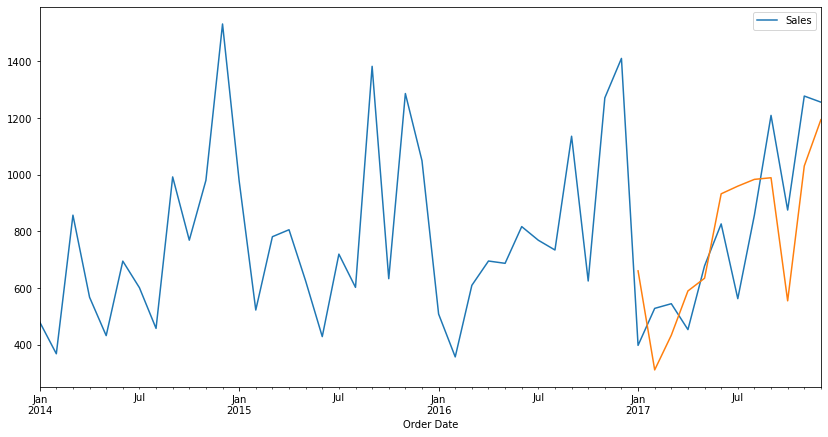

In [45]:
# 원본 데이터와 예측데이터를 하나의 plot으로 그려서 비교하기
ax = data.plot()
predictions.plot(ax=ax, figsize=(14, 7))